# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [13]:
def draw_landmarks(image, results):
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [14]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
     #                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
      #                       mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
       #                      ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [15]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [16]:
len(results.left_hand_landmarks.landmark)

21

In [17]:
results

mediapipe.python.solution_base.SolutionOutputs

In [18]:
draw_landmarks(frame, results)

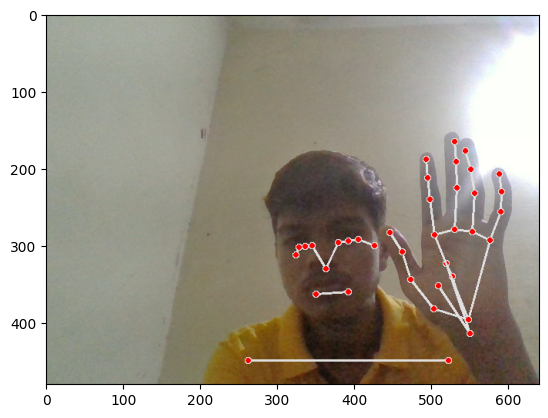

In [19]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [20]:
len(results.left_hand_landmarks.landmark)

21

In [21]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [24]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [26]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [27]:
result_test = extract_keypoints(results)

In [28]:
result_test

array([ 0.56773531,  0.68939883, -1.32547605, ...,  0.        ,
        0.        ,  0.        ])

In [115]:
468*3+33*4+21*3+21*3

1662

In [29]:
np.save('0', result_test)

In [30]:
np.load('0.npy')

array([ 0.56773531,  0.68939883, -1.32547605, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [31]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [32]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [160]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [158]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [33]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [34]:
label_map = {label:num for num, label in enumerate(actions)}

In [35]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [36]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [37]:
np.array(sequences).shape

(90, 30, 1662)

In [38]:
np.array(labels).shape

(90,)

In [39]:
X = np.array(sequences)

In [40]:
X.shape

(90, 30, 1662)

In [41]:
y = to_categorical(labels).astype(int)

In [ ]:
y

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [43]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [45]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [46]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [47]:
res = [.7, 0.2, 0.1]

In [48]:
actions[np.argmax(res)]

'hello'

In [49]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [50]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 165ms/step - loss: 4.7178 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 123ms/step - loss: 62.8447 - categorical_accuracy: 0.2941
Epoch 3/2000
3/3 [==============================] - 0s 138ms/step - loss: 25.6027 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 131ms/step - loss: 44.0188 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 135ms/step - loss: 29.1322 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 133ms/step - loss: 29.6536 - categorical_accuracy: 0.4353
Epoch 7/2000
3/3 [==============================] - 0s 135ms/step - loss: 38.4687 - categorical_accuracy: 0.3529
Epoch 8/2000
3/3 [==============================] - 0s 138ms/step - loss: 49.8137 - categorical_accuracy: 0.4000
Epoch 9/2000
3/3 [==============================] - 0s 128ms/step - loss: 87.9838 - categorical_a

3/3 [==============================] - 0s 132ms/step - loss: 0.6170 - categorical_accuracy: 0.7529
Epoch 74/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.6554 - categorical_accuracy: 0.7176
Epoch 75/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.5961 - categorical_accuracy: 0.7529
Epoch 76/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.6062 - categorical_accuracy: 0.7529
Epoch 77/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5840 - categorical_accuracy: 0.7647
Epoch 78/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.6109 - categorical_accuracy: 0.6941
Epoch 79/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.5873 - categorical_accuracy: 0.7059
Epoch 80/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.5488 - categorical_accuracy: 0.7765
Epoch 81/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.5601 - categorical_accuracy: 0.80

3/3 [==============================] - 0s 152ms/step - loss: 0.6334 - categorical_accuracy: 0.7529
Epoch 146/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.5366 - categorical_accuracy: 0.7176
Epoch 147/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.5091 - categorical_accuracy: 0.7765
Epoch 148/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.4051 - categorical_accuracy: 0.8706
Epoch 149/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.4136 - categorical_accuracy: 0.8235
Epoch 150/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.4334 - categorical_accuracy: 0.8471
Epoch 151/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.3678 - categorical_accuracy: 0.8824
Epoch 152/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.4629 - categorical_accuracy: 0.8235
Epoch 153/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.3907 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3811 - categorical_accuracy: 0.8588
Epoch 218/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.3377 - categorical_accuracy: 0.8235
Epoch 219/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.3053 - categorical_accuracy: 0.8941
Epoch 220/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3550 - categorical_accuracy: 0.8588
Epoch 221/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.3131 - categorical_accuracy: 0.8588
Epoch 222/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.4532 - categorical_accuracy: 0.8000
Epoch 223/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3778 - categorical_accuracy: 0.8588
Epoch 224/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.3540 - categorical_accuracy: 0.8941
Epoch 225/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.4825 - cat

3/3 [==============================] - 0s 140ms/step - loss: 0.3054 - categorical_accuracy: 0.9059
Epoch 289/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.2773 - categorical_accuracy: 0.8941
Epoch 290/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.2876 - categorical_accuracy: 0.8824
Epoch 291/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.2590 - categorical_accuracy: 0.8824
Epoch 292/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3626 - categorical_accuracy: 0.8000
Epoch 293/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.0088 - categorical_accuracy: 0.6588
Epoch 294/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.1149 - categorical_accuracy: 0.5765
Epoch 295/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.9478 - categorical_accuracy: 0.5529
Epoch 296/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.8147 - categorical_accura

Epoch 360/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.0878 - categorical_accuracy: 0.9882
Epoch 361/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.1733 - categorical_accuracy: 0.9412
Epoch 362/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.1365 - categorical_accuracy: 0.9529
Epoch 363/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.1196 - categorical_accuracy: 0.9765
Epoch 364/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1742 - categorical_accuracy: 0.9294
Epoch 365/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.2073 - categorical_accuracy: 0.9059
Epoch 366/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.2292 - categorical_accuracy: 0.8824
Epoch 367/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.2084 - categorical_accuracy: 0.9294
Epoch 368/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.2652 - cat

3/3 [==============================] - 0s 134ms/step - loss: 0.1427 - categorical_accuracy: 0.9647
Epoch 432/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.1780 - categorical_accuracy: 0.9529
Epoch 433/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.1677 - categorical_accuracy: 0.9176
Epoch 434/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.4159 - categorical_accuracy: 0.8353
Epoch 435/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.2666 - categorical_accuracy: 0.9059
Epoch 436/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.2097 - categorical_accuracy: 0.9647
Epoch 437/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.1863 - categorical_accuracy: 0.9412
Epoch 438/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.1546 - categorical_accuracy: 0.9529
Epoch 439/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.1394 - categorical_accura

Epoch 503/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.3526 - categorical_accuracy: 0.8118
Epoch 504/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.5000 - categorical_accuracy: 0.8235
Epoch 505/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3013 - categorical_accuracy: 0.9176
Epoch 506/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3411 - categorical_accuracy: 0.8706
Epoch 507/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.2266 - categorical_accuracy: 0.9412
Epoch 508/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.3534 - categorical_accuracy: 0.8824
Epoch 509/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.4826 - categorical_accuracy: 0.8000
Epoch 510/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.3502 - categorical_accuracy: 0.8941
Epoch 511/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.5492 - cat

3/3 [==============================] - 0s 138ms/step - loss: 0.0670 - categorical_accuracy: 0.9882
Epoch 575/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0618 - categorical_accuracy: 0.9765
Epoch 576/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.0521 - categorical_accuracy: 0.9882
Epoch 577/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0505 - categorical_accuracy: 0.9882
Epoch 578/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0579 - categorical_accuracy: 0.9765
Epoch 579/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.0583 - categorical_accuracy: 0.9882
Epoch 580/2000
3/3 [==============================] - 0s 161ms/step - loss: 0.0506 - categorical_accuracy: 0.9765
Epoch 581/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0541 - categorical_accuracy: 0.9882
Epoch 582/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.0430 - categorical_accura

Epoch 646/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.4358 - categorical_accuracy: 0.8118
Epoch 647/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.5940 - categorical_accuracy: 0.7882
Epoch 648/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.4897 - categorical_accuracy: 0.8000
Epoch 649/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.4779 - categorical_accuracy: 0.7647
Epoch 650/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.4810 - categorical_accuracy: 0.7882
Epoch 651/2000
3/3 [==============================] - 0s 148ms/step - loss: 0.3259 - categorical_accuracy: 0.8588
Epoch 652/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.3020 - categorical_accuracy: 0.8824
Epoch 653/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.2824 - categorical_accuracy: 0.8588
Epoch 654/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.2383 - cat

3/3 [==============================] - 0s 131ms/step - loss: 0.6196 - categorical_accuracy: 0.7412
Epoch 718/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.4899 - categorical_accuracy: 0.8118
Epoch 719/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.5045 - categorical_accuracy: 0.8235
Epoch 720/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.5077 - categorical_accuracy: 0.8000
Epoch 721/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.5894 - categorical_accuracy: 0.7765
Epoch 722/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.5604 - categorical_accuracy: 0.7529
Epoch 723/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.5770 - categorical_accuracy: 0.7882
Epoch 724/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.7162 - categorical_accuracy: 0.7176
Epoch 725/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.6483 - categorical_accura

Epoch 789/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.8611 - categorical_accuracy: 0.6118
Epoch 790/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.8791 - categorical_accuracy: 0.6000
Epoch 791/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.7233 - categorical_accuracy: 0.6824
Epoch 792/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.7221 - categorical_accuracy: 0.6118
Epoch 793/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.6779 - categorical_accuracy: 0.7059
Epoch 794/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.6807 - categorical_accuracy: 0.7059
Epoch 795/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.6068 - categorical_accuracy: 0.7765
Epoch 796/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.6814 - categorical_accuracy: 0.7529
Epoch 797/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.8769 - cat

3/3 [==============================] - 0s 120ms/step - loss: 0.4268 - categorical_accuracy: 0.8706
Epoch 861/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.4811 - categorical_accuracy: 0.8000
Epoch 862/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5673 - categorical_accuracy: 0.8000
Epoch 863/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.6136 - categorical_accuracy: 0.7294
Epoch 864/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.4816 - categorical_accuracy: 0.8000
Epoch 865/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.4522 - categorical_accuracy: 0.8706
Epoch 866/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.5508 - categorical_accuracy: 0.8235
Epoch 867/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.4893 - categorical_accuracy: 0.8471
Epoch 868/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.6139 - categorical_accura

Epoch 932/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3028 - categorical_accuracy: 0.9176
Epoch 933/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.2638 - categorical_accuracy: 0.9294
Epoch 934/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.2346 - categorical_accuracy: 0.9294
Epoch 935/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.2657 - categorical_accuracy: 0.9294
Epoch 936/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.2122 - categorical_accuracy: 0.9294
Epoch 937/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.3881 - categorical_accuracy: 0.8235
Epoch 938/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.6672 - categorical_accuracy: 0.6824
Epoch 939/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.5008 - categorical_accuracy: 0.8235
Epoch 940/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.4608 - cat

3/3 [==============================] - 0s 133ms/step - loss: 0.5165 - categorical_accuracy: 0.8235
Epoch 1004/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.4705 - categorical_accuracy: 0.8353
Epoch 1005/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.4880 - categorical_accuracy: 0.8118
Epoch 1006/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.5202 - categorical_accuracy: 0.8235
Epoch 1007/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.5725 - categorical_accuracy: 0.7647
Epoch 1008/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.5144 - categorical_accuracy: 0.8000
Epoch 1009/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.4466 - categorical_accuracy: 0.8118
Epoch 1010/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.5708 - categorical_accuracy: 0.7647
Epoch 1011/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.4056 - categorica

3/3 [==============================] - 0s 135ms/step - loss: 0.5798 - categorical_accuracy: 0.7765
Epoch 1075/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.7125 - categorical_accuracy: 0.6941
Epoch 1076/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.5529 - categorical_accuracy: 0.8000
Epoch 1077/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.6896 - categorical_accuracy: 0.7529
Epoch 1078/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.5634 - categorical_accuracy: 0.8471
Epoch 1079/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.7664 - categorical_accuracy: 0.7412
Epoch 1080/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.4510 - categorical_accuracy: 0.8471
Epoch 1081/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.4022 - categorical_accuracy: 0.8706
Epoch 1082/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.3597 - categorica

3/3 [==============================] - 0s 135ms/step - loss: 0.5241 - categorical_accuracy: 0.7529
Epoch 1146/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.4357 - categorical_accuracy: 0.8471
Epoch 1147/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.4468 - categorical_accuracy: 0.7882
Epoch 1148/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.4571 - categorical_accuracy: 0.8235
Epoch 1149/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.4619 - categorical_accuracy: 0.7529
Epoch 1150/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.4420 - categorical_accuracy: 0.8118
Epoch 1151/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.3818 - categorical_accuracy: 0.8471
Epoch 1152/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.4054 - categorical_accuracy: 0.8471
Epoch 1153/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3844 - categorica

3/3 [==============================] - 0s 130ms/step - loss: 0.3954 - categorical_accuracy: 0.8235
Epoch 1217/2000
3/3 [==============================] - 0s 156ms/step - loss: 0.3938 - categorical_accuracy: 0.8471
Epoch 1218/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.3942 - categorical_accuracy: 0.8000
Epoch 1219/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.3611 - categorical_accuracy: 0.8706
Epoch 1220/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.3334 - categorical_accuracy: 0.8706
Epoch 1221/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3608 - categorical_accuracy: 0.8588
Epoch 1222/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3523 - categorical_accuracy: 0.8588
Epoch 1223/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.5984 - categorical_accuracy: 0.8000
Epoch 1224/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.5265 - categorica

3/3 [==============================] - 0s 133ms/step - loss: 0.4176 - categorical_accuracy: 0.8588
Epoch 1288/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3542 - categorical_accuracy: 0.8118
Epoch 1289/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.3573 - categorical_accuracy: 0.8824
Epoch 1290/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.4139 - categorical_accuracy: 0.8235
Epoch 1291/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.4689 - categorical_accuracy: 0.7882
Epoch 1292/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.3329 - categorical_accuracy: 0.8941
Epoch 1293/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.3437 - categorical_accuracy: 0.8941
Epoch 1294/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.3978 - categorical_accuracy: 0.8471
Epoch 1295/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.5635 - categorica

3/3 [==============================] - 0s 137ms/step - loss: 0.1097 - categorical_accuracy: 0.9647
Epoch 1359/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0947 - categorical_accuracy: 0.9647
Epoch 1360/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0960 - categorical_accuracy: 0.9882
Epoch 1361/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.0909 - categorical_accuracy: 0.9647
Epoch 1362/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.0919 - categorical_accuracy: 0.9765
Epoch 1363/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.1032 - categorical_accuracy: 0.9647
Epoch 1364/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1054 - categorical_accuracy: 0.9529
Epoch 1365/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.0852 - categorical_accuracy: 0.9647
Epoch 1366/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.1257 - categorica

3/3 [==============================] - 0s 146ms/step - loss: 0.1948 - categorical_accuracy: 0.9294
Epoch 1430/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.2295 - categorical_accuracy: 0.9412
Epoch 1431/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.4109 - categorical_accuracy: 0.8588
Epoch 1432/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.4808 - categorical_accuracy: 0.8000
Epoch 1433/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.4367 - categorical_accuracy: 0.8000
Epoch 1434/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.3772 - categorical_accuracy: 0.8353
Epoch 1435/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.4547 - categorical_accuracy: 0.7882
Epoch 1436/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3320 - categorical_accuracy: 0.8471
Epoch 1437/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.2762 - categorica

3/3 [==============================] - 0s 137ms/step - loss: 0.6125 - categorical_accuracy: 0.6588
Epoch 1501/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.5408 - categorical_accuracy: 0.7647
Epoch 1502/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.5134 - categorical_accuracy: 0.7882
Epoch 1503/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.4186 - categorical_accuracy: 0.8588
Epoch 1504/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3545 - categorical_accuracy: 0.8824
Epoch 1505/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3452 - categorical_accuracy: 0.8588
Epoch 1506/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.3356 - categorical_accuracy: 0.8941
Epoch 1507/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.2537 - categorical_accuracy: 0.9176
Epoch 1508/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5836 - categorica

3/3 [==============================] - 0s 133ms/step - loss: 0.0699 - categorical_accuracy: 0.9765
Epoch 1572/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.0464 - categorical_accuracy: 0.9882
Epoch 1573/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0472 - categorical_accuracy: 0.9765
Epoch 1574/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.0704 - categorical_accuracy: 0.9882
Epoch 1575/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.0949 - categorical_accuracy: 0.9647
Epoch 1576/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.0880 - categorical_accuracy: 0.9529
Epoch 1577/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.0745 - categorical_accuracy: 0.9882
Epoch 1578/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.0842 - categorical_accuracy: 0.9765
Epoch 1579/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.1348 - categorica

3/3 [==============================] - 0s 134ms/step - loss: 0.0400 - categorical_accuracy: 0.9882
Epoch 1643/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.0206 - categorical_accuracy: 0.9882
Epoch 1644/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0119 - categorical_accuracy: 1.0000
Epoch 1645/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0116 - categorical_accuracy: 1.0000
Epoch 1646/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0107 - categorical_accuracy: 1.0000
Epoch 1647/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 1648/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.0093 - categorical_accuracy: 1.0000
Epoch 1649/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0057 - categorical_accuracy: 1.0000
Epoch 1650/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.0075 - categorica

3/3 [==============================] - 0s 147ms/step - loss: 1.0641 - categorical_accuracy: 0.3529
Epoch 1714/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.4161 - categorical_accuracy: 0.2471
Epoch 1715/2000
3/3 [==============================] - 0s 127ms/step - loss: 667.9735 - categorical_accuracy: 0.3765
Epoch 1716/2000
3/3 [==============================] - 0s 136ms/step - loss: 186.1616 - categorical_accuracy: 0.2588
Epoch 1717/2000
3/3 [==============================] - 0s 134ms/step - loss: 5.1778 - categorical_accuracy: 0.2941
Epoch 1718/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.6613 - categorical_accuracy: 0.4000
Epoch 1719/2000
3/3 [==============================] - 0s 128ms/step - loss: 6.0521 - categorical_accuracy: 0.2588
Epoch 1720/2000
3/3 [==============================] - 0s 131ms/step - loss: 5.7896 - categorical_accuracy: 0.2824
Epoch 1721/2000
3/3 [==============================] - 0s 135ms/step - loss: 4.2211 - catego

3/3 [==============================] - 0s 135ms/step - loss: 1.0186 - categorical_accuracy: 0.5647
Epoch 1785/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.9979 - categorical_accuracy: 0.4471
Epoch 1786/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.9050 - categorical_accuracy: 0.5294
Epoch 1787/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.9414 - categorical_accuracy: 0.5412
Epoch 1788/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.8949 - categorical_accuracy: 0.5647
Epoch 1789/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.8862 - categorical_accuracy: 0.5412
Epoch 1790/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.9980 - categorical_accuracy: 0.4000
Epoch 1791/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.0061 - categorical_accuracy: 0.5059
Epoch 1792/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.8847 - categorica

3/3 [==============================] - 0s 136ms/step - loss: 0.7597 - categorical_accuracy: 0.6471
Epoch 1856/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.7327 - categorical_accuracy: 0.6118
Epoch 1857/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.7301 - categorical_accuracy: 0.6235
Epoch 1858/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.7509 - categorical_accuracy: 0.6000
Epoch 1859/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.7592 - categorical_accuracy: 0.6118
Epoch 1860/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.7086 - categorical_accuracy: 0.6588
Epoch 1861/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.6810 - categorical_accuracy: 0.7059
Epoch 1862/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.7211 - categorical_accuracy: 0.5765
Epoch 1863/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.6696 - categorica

3/3 [==============================] - 0s 139ms/step - loss: 0.5477 - categorical_accuracy: 0.7176
Epoch 1927/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.5141 - categorical_accuracy: 0.7882
Epoch 1928/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.6151 - categorical_accuracy: 0.6706
Epoch 1929/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.6711 - categorical_accuracy: 0.7294
Epoch 1930/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.1720 - categorical_accuracy: 0.4941
Epoch 1931/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.9730 - categorical_accuracy: 0.6118
Epoch 1932/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.9852 - categorical_accuracy: 0.6118
Epoch 1933/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.7543 - categorical_accuracy: 0.6235
Epoch 1934/2000
3/3 [==============================] - 0s 139ms/step - loss: 0.8021 - categorica

3/3 [==============================] - 0s 155ms/step - loss: 0.3732 - categorical_accuracy: 0.9176
Epoch 1998/2000
3/3 [==============================] - 0s 138ms/step - loss: 0.3503 - categorical_accuracy: 0.8706
Epoch 1999/2000
3/3 [==============================] - 0s 147ms/step - loss: 0.4516 - categorical_accuracy: 0.7529
Epoch 2000/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.3680 - categorical_accuracy: 0.9059


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [52]:
res = model.predict(X_test)

1/1 [==============================] - 1s 575ms/step


In [53]:
actions[np.argmax(res[4])]

'hello'

In [54]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [55]:
model.save('action.h5')

In [217]:
del model

In [56]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [57]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [58]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 44ms/step


In [59]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [60]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 1],
        [1, 1]],

       [[2, 1],
        [0, 2]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [61]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in Real Time

In [62]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [63]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [19]:
sequence.reverse()

In [23]:
len(sequence)

1

In [51]:
sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [67]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 38ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 53ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 57ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 63ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 72ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 49ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 51ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 38ms/step
ilov

1/1 [==============================] - 0s 47ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 47ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
ilov

1/1 [==============================] - 0s 39ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 42ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.py

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 44ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [============

1/1 [==============================] - 0s 51ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 57ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 50ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 59ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 48ms/step
ilov

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)